## Lab | Cleaning numerical data

Import the necessary libreries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [2]:
pd.set_option('display.max_columns', None)
customer_df = pd.read_csv('C:/Users/ameli/IRONHACK/WEEK_4/DAY_1/MORNING_SESSION/lab-cleaning-numerical-data/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

#### First look at its main features (head, shape, info).

In [3]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.shape

(9134, 24)

In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

#### Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores).

In [6]:
customer_df.columns = [header.lower().replace(' ', '_') for header in list(customer_df.columns)]
customer_df = customer_df.rename(columns = {'employmentstatus': 'employment_status'})
print(customer_df.columns)

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')


#### Change effective to date column to datetime format.

In [7]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])
print(customer_df['effective_to_date'].dtype)

datetime64[ns]


#### Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

In [8]:
numerical = customer_df.select_dtypes(include='number')
categorical_df = customer_df.select_dtypes(include=object)

In [9]:
numerical_cols = list(numerical.columns)
print('Header names of numerical before splitting:', 
      numerical_cols)

Header names of numerical before splitting: ['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies', 'total_claim_amount']


In [10]:
def data_dicrete_and_continuous(df):
    discrete_cols = []
    continuous_cols = []
    threshold = df.shape[0]*0.02

    for i in df.columns:
        unique_values = df[i].nunique()
        if unique_values < threshold:
            discrete_cols.append(i)
        else:
            continuous_cols.append(i)

    return discrete_cols, continuous_cols

In [11]:
discrete, continuous = data_dicrete_and_continuous(numerical)
print('Discrete cols', discrete)
print('')
print('Continuous cols', continuous)

Discrete cols ['months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies']

Continuous cols ['customer_lifetime_value', 'income', 'monthly_premium_auto', 'total_claim_amount']


#### Plot a correlation matrix, comment what you see.

In [12]:
matrix_correlation = numerical.corr()
matrix_correlation

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


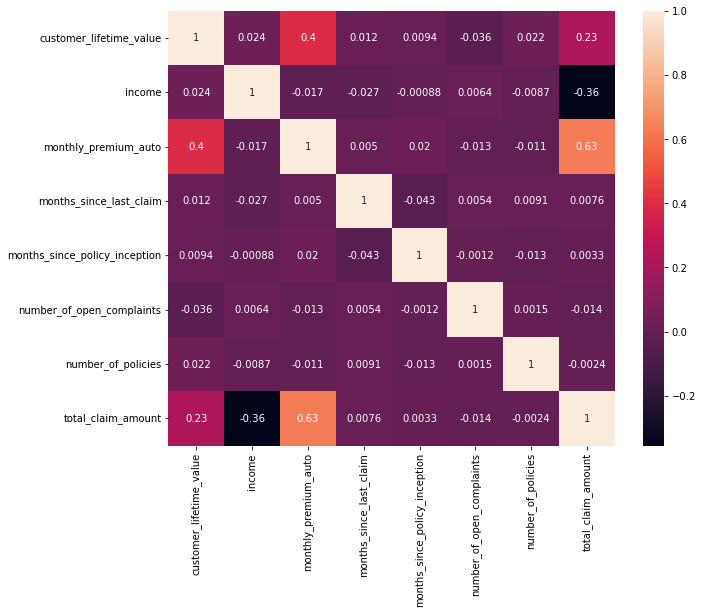

In [13]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(matrix_correlation, annot=True)
plt.show()

Comment: All the correlations higher than 0.20 -highlighted on the heatmap above- correspond to continuous features:

- There's a positive and moderate correlation (0.63) between total_claim_amount and monthly_premium_amount.
- There's also a positive and moderate correlation (0.4) between monthly_premium_auto and customer_lifetime_value.
- Features income and total_claim_amount show a weak and negative correlation (-0.36), while the coefficient between total_claim_amount and customer_lifetime_value indicates a weak -but positive- correlation (0.23).

#### Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

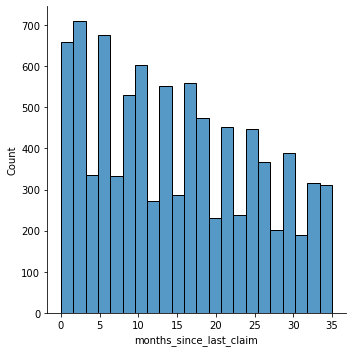

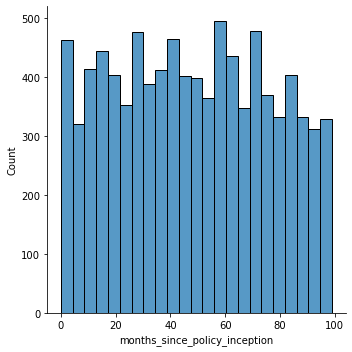

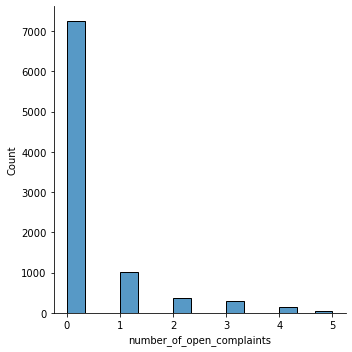

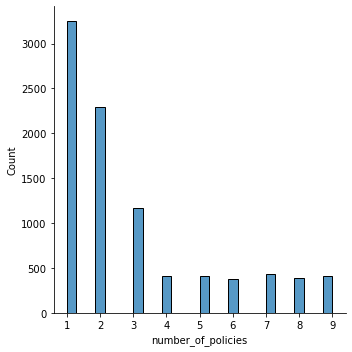

In [14]:
for col in numerical[discrete]:
    sns.displot(numerical[col])
    plt.show()

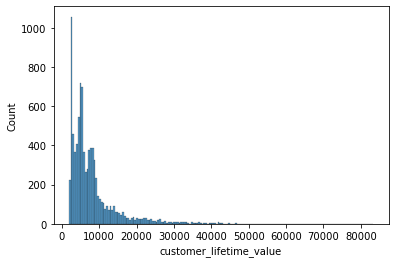

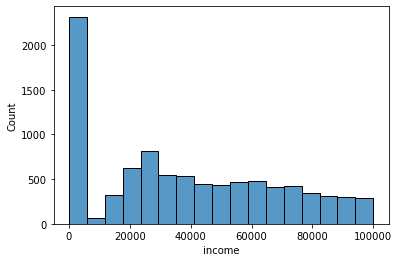

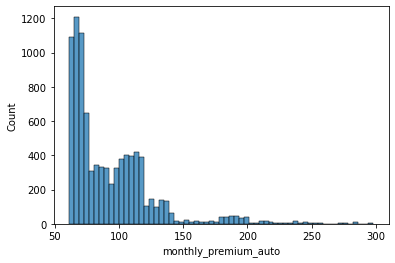

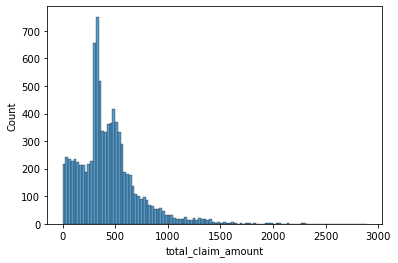

In [15]:
for col in numerical[continuous]:
    sns.histplot(numerical[col])
    plt.show()

The plots for discrete data show that, although the data from these columns are being considered numerical, an option would be to transform them into categorical features.

The plots for continuous columns show data heavily skewed, so it would be wise to look for outliers and decide what to do with tails. Also, it is not efficient to keep these plots if we want to obtain useful information, we could also consider binning the data.

#### Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

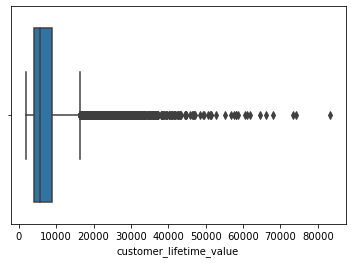

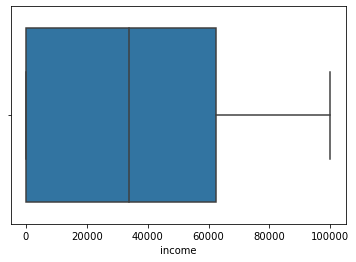

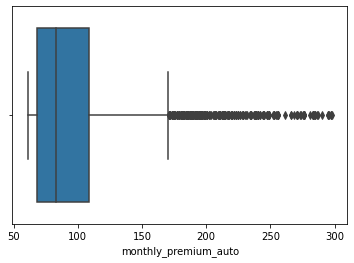

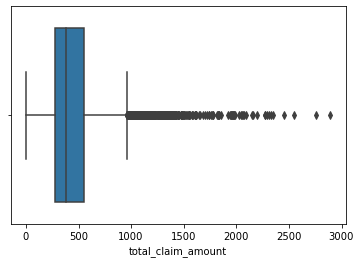

In [16]:
for col in numerical[continuous]:
    sns.boxplot(x = numerical[col])
    plt.show()

Data suggest that columns total_claim_amount and customer_lifetime_value contain outliers. Also, together with monthly_premium_auto, the three columns present long tails.

#### Did you find outliers? Comment what you will do with them.

Yes, I did. First, I am going to identify those outliers and, depending on the number of values, I'll decide later whether I'll drop them.

In [17]:
# How many outliers do our data present?

# TCA
iqr_tca = np.nanpercentile(numerical['total_claim_amount'],75) - np.nanpercentile(numerical['total_claim_amount'],25)
upper_limit_tca = np.nanpercentile(numerical['total_claim_amount'],75) + 1.5*iqr_tca
tca_outliers = numerical[numerical['total_claim_amount'] >= upper_limit_tca]
print('Number of outliers of total_claim_amount:', 
      len(tca_outliers))
print('% Outliers:', 
      (len(tca_outliers) / customer_df.shape[0])*100)

Number of outliers of total_claim_amount: 453
% Outliers: 4.959492007882636


In [18]:
# Customer_lifetime_value
iqr_clv = np.nanpercentile(numerical['customer_lifetime_value'],75) - np.nanpercentile(numerical['customer_lifetime_value'],25)
upper_limit_clv = np.nanpercentile(numerical['customer_lifetime_value'],75) + 1.5*iqr_clv
clv_outliers = numerical[numerical['customer_lifetime_value'] >= upper_limit_clv]

print('Number of outliers of customer_lifetime_value:', len(clv_outliers))
print('% Outliers:', (len(clv_outliers) / customer_df.shape[0])*100)

Number of outliers of customer_lifetime_value: 817
% Outliers: 8.944602583753012


We're going to apply log transformation before droping these outliers.

In [19]:
numerical['tca_LOG'] = np.log(numerical['total_claim_amount'])
numerical['tca_LOG'] = numerical['tca_LOG'].fillna(np.mean(numerical['tca_LOG']))
                                                                                    
numerical['clv_LOG'] = np.log(numerical['customer_lifetime_value'])
numerical['clv_LOG'] = numerical['clv_LOG'].fillna(np.mean(numerical['clv_LOG']))

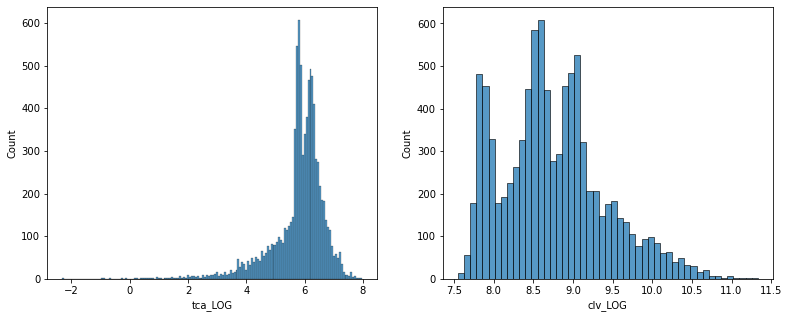

In [20]:
# Plotting data after log transformation
fig, ax = plt.subplots(1,2, figsize = (13,5))
sns.histplot(numerical['tca_LOG'], ax = ax[0])
sns.histplot(numerical['clv_LOG'], ax = ax[1])   
plt.show()

In [21]:
# Now let's check how many outliers our columns have

In [22]:
iqr_tca_log = np.nanpercentile(numerical['tca_LOG'],75) - np.nanpercentile(numerical['tca_LOG'],25)
upper_limit = np.nanpercentile(numerical['tca_LOG'],75) + 1.5*iqr_tca_log
lower_limit = np.nanpercentile(numerical['tca_LOG'],25) - 1.5*iqr_tca_log
tca_outliers_log = numerical[(numerical['tca_LOG'] >= upper_limit) | (numerical['tca_LOG'] <= lower_limit)]
print('Number of outliers of tca_log:', 
      len(tca_outliers_log))
print('% Outliers:', 
      (len(tca_outliers_log) / customer_df.shape[0])*100)

Number of outliers of tca_log: 901
% Outliers: 9.864243485876942


In [23]:
iqr_clv_log = np.nanpercentile(numerical['clv_LOG'],75) - np.nanpercentile(numerical['clv_LOG'],25)
upper_limit_tcalog = np.nanpercentile(numerical['clv_LOG'],75) + 1.5*iqr_tca_log
lower_limit_tcalog = np.nanpercentile(numerical['clv_LOG'],25) - 1.5*iqr_tca_log
clv_outliers_log = numerical[(numerical['clv_LOG'] >= upper_limit_tcalog) | (numerical['clv_LOG'] <= lower_limit_tcalog)
                            ]
print('Number of outliers of clv_LOG:', len(clv_outliers_log))
print('% Outliers:', (len(clv_outliers_log) / customer_df.shape[0])*100)

Number of outliers of clv_LOG: 304
% Outliers: 3.328224217210422


As the number of CLV outliers decreased, the number of TCA outliers increased. Let's go one step back and drop them. 

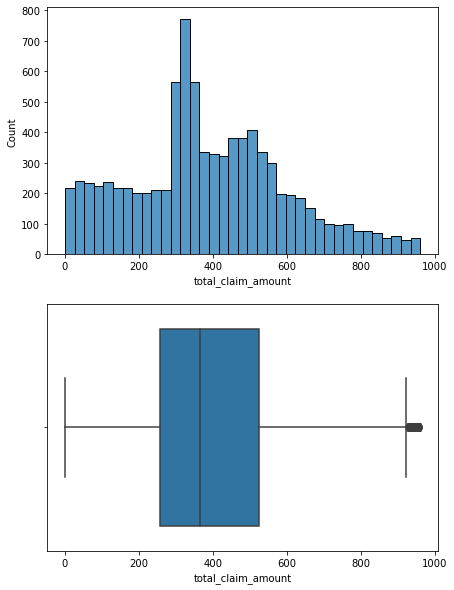

In [24]:
# Drop cols recently created for log transformation
numerical = numerical.drop(['tca_LOG', 'clv_LOG'], axis=1)

tca_outliers_dropped = numerical[numerical['total_claim_amount'] <= upper_limit_tca].copy()
fig, ax = plt.subplots(2, figsize = (7,10))
sns.histplot(x = tca_outliers_dropped['total_claim_amount'], ax = ax[0])
sns.boxplot(x = tca_outliers_dropped['total_claim_amount'], ax = ax[1])

plt.show()

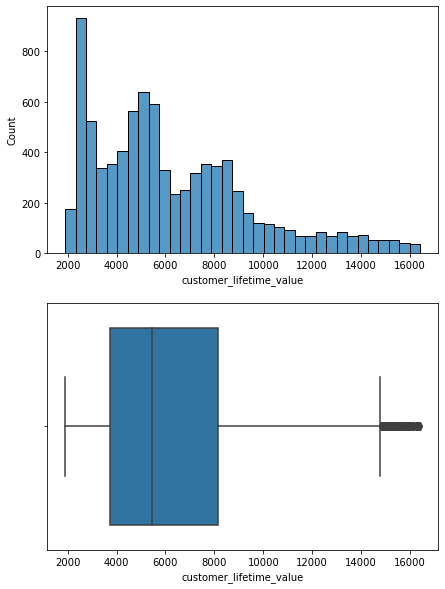

In [25]:
clv_outliers_dropped = numerical[numerical['customer_lifetime_value'] <= upper_limit_clv].copy()
fig, ax = plt.subplots(2, figsize = (7,10))
sns.histplot(x = clv_outliers_dropped['customer_lifetime_value'], ax = ax[0])
sns.boxplot(x = clv_outliers_dropped['customer_lifetime_value'], ax = ax[1])

plt.show()

There are still some extreme values on both columns, but the number of outliers has decreased substantially. 

## Cleaning categorical data

Find all of the categorical data. Save it in a categorical_df variable --> **Already done**

#### Check for NaN values.

In [26]:
categorical_df.isna().sum()

customer             0
state                0
response             0
coverage             0
education            0
employment_status    0
gender               0
location_code        0
marital_status       0
policy_type          0
policy               0
renew_offer_type     0
sales_channel        0
vehicle_class        0
vehicle_size         0
dtype: int64

In [27]:
num_unique_val = categorical_df.nunique()
unique_val_cols = [categorical_df[x].unique().tolist() for x in categorical_df]

print(num_unique_val)
print('')
#Not displaying unique values for customer (ID)
print(unique_val_cols[1:15]) 

customer             9134
state                   5
response                2
coverage                3
education               5
employment_status       5
gender                  2
location_code           3
marital_status          3
policy_type             3
policy                  9
renew_offer_type        4
sales_channel           4
vehicle_class           6
vehicle_size            3
dtype: int64

[['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'], ['No', 'Yes'], ['Basic', 'Extended', 'Premium'], ['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'], ['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired'], ['F', 'M'], ['Suburban', 'Rural', 'Urban'], ['Married', 'Single', 'Divorced'], ['Corporate Auto', 'Personal Auto', 'Special Auto'], ['Corporate L3', 'Personal L3', 'Corporate L2', 'Personal L1', 'Special L2', 'Corporate L1', 'Personal L2', 'Special L1', 'Special L3'], ['Offer1', 'Offer3', 'Offer2', 'Offer4'], ['Agent', 'Call Center', 'Web', 'Bran

#### Check dtypes. Do they all make sense as categorical data?

In [28]:
categorical_df.dtypes

customer             object
state                object
response             object
coverage             object
education            object
employment_status    object
gender               object
location_code        object
marital_status       object
policy_type          object
policy               object
renew_offer_type     object
sales_channel        object
vehicle_class        object
vehicle_size         object
dtype: object

Not really. Column customer identifies each customer as if it were an ID (all values are unique). Besides, we're not going to use this column to make predictions so we can drop it.

In [29]:
categorical_df = categorical_df.drop(['customer'], axis = 1)

#### Does any column contain alpha and numeric data? Decide how to clean it.

If I had not decided to drop the first column (customer), I guess I could check whether deleting the first two letters of each cell would translate into having duplicate values. If this were not the case, I could clean it this way. 

#### Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions.

- State: leave it as it is. 
- Response: OneHotEncoder
- Coverage: ordinal encoding 
- Education: Combine 'master' and 'doctor' over 'Other high level studies' and ordinal encoding 
- Employment_status: combine Unemployed with Medical Leave and Disabled and ordinal encoding 
- Gender: OneHotEncoder
- Location_code: Ordinal encoding
- Marital_status: OneHotEncoder
- policy_type: drop column   
- policy: OneHotEncoder           
- renew_offer_type: OneHotEncoder
- sales_channel: OneHotEncoder     
- vehicle_class: Combine luxury car + Luxury SUV + sport car over 'Luxury_Car' and ordinal encoding
- vehicle_size: ordinal encoding

#### Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

In [30]:
print(categorical_df['policy'].value_counts())
print('')
print(categorical_df['policy_type'].value_counts())

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64


*Policy type contains redundant information already stored on 'Policy'. As mentioned before, to reduce the complexity of the model, I would drop this column. Also, the data counts displayed suggest that Special policy is underrepresented (class imbalance). Maybe we could consider droping these rows.*

#### Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.

In [31]:
# Droping policy_type column
categorical_df = categorical_df.drop(['policy_type'], axis = 1)

# COVERAGE
print('Unique values:', categorical_df['coverage'].unique())
print('Unique values:', categorical_df['coverage'].value_counts(), '\n')

# Manually encoding
categorical_df['coverage'] = categorical_df['coverage'].replace({'Basic': 0, 
                                                                 'Extended': 0.5,
                                                                 'Premium':1})


print('Unique values:', categorical_df['coverage'].unique())
print('Unique values:', categorical_df['coverage'].value_counts())


Unique values: ['Basic' 'Extended' 'Premium']
Unique values: Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64 

Unique values: [0.  0.5 1. ]
Unique values: 0.0    5568
0.5    2742
1.0     824
Name: coverage, dtype: int64


In [32]:
# EDUCATION
print('Unique values:', categorical_df['education'].unique())
print('Unique values:', categorical_df['education'].value_counts(), '\n')

def combine(x):
    if 'Master' in x or 'Doctor' in x:
        return 'Post uni'
    else:
        return x

categorical_df["education"] = categorical_df["education"].apply(combine)
categorical_df["education"] = categorical_df["education"].replace({'High School or Below': 0,
                                                                  'College': 0.33,
                                                                  'Bachelor': 0.66,
                                                                  'Post uni': 1})


print('Unique values:', categorical_df['education'].unique())
print('Unique values:', categorical_df['education'].value_counts(), '\n')

Unique values: ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
Unique values: Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64 

Unique values: [0.66 0.33 1.   0.  ]
Unique values: 0.66    2748
0.33    2681
0.00    2622
1.00    1083
Name: education, dtype: int64 



In [33]:
# EMPLOYMENT STATUS
print('Unique values:', categorical_df['employment_status'].unique())
print('Unique values:', categorical_df['employment_status'].value_counts(), '\n')

def combine_employmentstatus(x):
    if x in ['Medical Leave', 'Disabled']:
        return 'Unemployed'
    else:
        return x

categorical_df["employment_status"] = categorical_df["employment_status"].apply(combine_employmentstatus)

categorical_df['employment_status'] = categorical_df['employment_status'].replace({'Unemployed': 0, 
                                                             'Retired': 0.5,
                                                             'Employed': 1})

print('Unique values:', categorical_df['employment_status'].unique())
print('Unique values:', categorical_df['employment_status'].value_counts(), '\n')

Unique values: ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
Unique values: Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employment_status, dtype: int64 

Unique values: [1.  0.  0.5]
Unique values: 1.0    5698
0.0    3154
0.5     282
Name: employment_status, dtype: int64 



In [34]:
# LOCATION CODE
print('Unique values:', categorical_df['location_code'].unique())
print('Unique values:', categorical_df['location_code'].value_counts(), '\n')

categorical_df['location_code'] = categorical_df['location_code'].replace({'Rural': 0, 
                                                             'Suburban': 0.5,
                                                             'Urban': 1})
print('Unique values:', categorical_df['location_code'].unique())
print('Unique values:', categorical_df['location_code'].value_counts(), '\n')

Unique values: ['Suburban' 'Rural' 'Urban']
Unique values: Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64 

Unique values: [0.5 0.  1. ]
Unique values: 0.5    5779
0.0    1773
1.0    1582
Name: location_code, dtype: int64 



In [35]:
# VEHICLE SIZE
print('Unique values:', categorical_df['vehicle_size'].unique())
print('Unique values:', categorical_df['vehicle_size'].value_counts(), '\n')

categorical_df['vehicle_size'] = categorical_df['vehicle_size'].replace({"Small" : 0, 
                                                                         "Medsize" :0.5, 
                                                                         "Large" : 1,})
print('Unique values:', categorical_df['vehicle_size'].unique())
print('Unique values:', categorical_df['vehicle_size'].value_counts(), '\n')

Unique values: ['Medsize' 'Small' 'Large']
Unique values: Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64 

Unique values: [0.5 0.  1. ]
Unique values: 0.5    6424
0.0    1764
1.0     946
Name: vehicle_size, dtype: int64 



In [36]:
# VEHICLE CLASS
print('Unique values:', categorical_df['vehicle_class'].unique())
print('Unique values:', categorical_df['vehicle_class'].value_counts(), '\n')

['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury SUV', 'Sports Car', 'Luxury Car']

categorical_df['vehicle_class'] = categorical_df['vehicle_class'].replace({'Two-Door Car':0,
                                                                           'Four-Door Car':0.33, 
                                                                           'SUV':0.66,
                                                                           'Luxury SUV':1,
                                                                           'Sports Car':1,
                                                                           'Luxury Car':1,})
print('Unique values:', categorical_df['vehicle_class'].unique())
print('Unique values:', categorical_df['vehicle_class'].value_counts(), '\n')

Unique values: ['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']
Unique values: Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64 

Unique values: [0.   0.33 0.66 1.  ]
Unique values: 0.33    4621
0.00    1886
0.66    1796
1.00     831
Name: vehicle_class, dtype: int64 



In [37]:
# One Hot Encoding

categorical_cols_ohe = categorical_df[['state','response', 'gender', 'marital_status', 
                                      'policy', 'renew_offer_type', 'sales_channel']]

encoder = OneHotEncoder(drop='first').fit(categorical_cols_ohe)
cols = encoder.get_feature_names(input_features = categorical_cols_ohe.columns)
categorical_cols_encoded = pd.DataFrame(encoder.transform(categorical_cols_ohe).toarray(),columns=cols)

display(categorical_cols_encoded)

C:\Users\ameli\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,gender_M,marital_status_Married,marital_status_Single,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9130,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9131,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9132,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [38]:
# Combine both categorical dataframes
cat_clean_df = pd.concat([categorical_df, categorical_cols_encoded], axis=1)
cat_clean_df = cat_clean_df.drop(['state','response', 'gender', 'marital_status', 
                                      'policy', 'renew_offer_type', 'sales_channel'], axis=1)

In [39]:
# Lastly, combine numerical and categorical data
customer_clean = pd.concat([cat_clean_df, numerical], axis=1)
display(customer_clean)

,coverage,education,employment_status,location_code,vehicle_class,vehicle_size,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,gender_M,marital_status_Married,marital_status_Single,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0.0,0.66,1.0,0.5,0.00,0.5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2763.519279,56274,69,32,5,0,1,384.811147
1,0.5,0.66,0.0,0.5,0.33,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6979.535903,0,94,13,42,0,8,1131.464935
2,1.0,0.66,1.0,0.5,0.00,0.5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12887.431650,48767,108,18,38,0,2,566.472247
3,0.0,0.66,0.0,0.5,0.66,0.5,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7645.861827,0,106,18,65,0,7,529.881344
4,0.0,0.66,1.0,0.0,0.33,0.5,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0.0,0.66,1.0,1.0,0.33,0.5,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,23405.987980,71941,73,18,89,0,2,198.234764
9130,0.5,0.33,1.0,0.5,0.33,0.5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3096.511217,21604,79,14,28,0,1,379.200000
9131,0.5,0.66,0.0,0.5,0.33,0.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8163.890428,0,85,9,37,3,2,790.784983
9132,0.5,0.33,1.0,0.5,0.33,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,7524.442436,21941,96,34,3,0,3,691.200000


## Regression models

#### In this final lab, we will model our data. Import sklearn train_test_split and separate the data.

In [40]:
y = customer_clean['total_claim_amount']
X = customer_clean.drop('total_claim_amount', axis=1)

#X_train, y_test, X_test, y_test = 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X train set shape is:', X_train.shape)
print('y train set shape is:', y_train.shape)
print('X test set shape is:', X_test.shape)
print('y test set shape is:', y_test.shape)

X train set shape is: (7307, 35)
y train set shape is: (7307,)
X test set shape is: (1827, 35)
y test set shape is: (1827,)


#### We will start with removing outliers, if you have not already done so. We have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

Already done in the first part of the lab.

#### Create a copy of the dataframe for the data wrangling.

In [41]:
customer_cp = customer_clean.copy()
display(customer_cp.head())

,coverage,education,employment_status,location_code,vehicle_class,vehicle_size,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,gender_M,marital_status_Married,marital_status_Single,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0.0,0.66,1.0,0.5,0.00,0.5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2763.519279,56274,69,32,5,0,1,384.811147
1,0.5,0.66,0.0,0.5,0.33,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6979.535903,0,94,13,42,0,8,1131.464935
2,1.0,0.66,1.0,0.5,0.00,0.5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12887.431650,48767,108,18,38,0,2,566.472247
3,0.0,0.66,0.0,0.5,0.66,0.5,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7645.861827,0,106,18,65,0,7,529.881344
4,0.0,0.66,1.0,0.0,0.33,0.5,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2813.692575,43836,73,12,44,0,1,138.130879


#### Normalize the continuous variables. You can use any one method you want.

I guess we also need to normalize the discrete numerical data, so I am going tu apply the MinxMax() scaler over all the numerical columns.

In [42]:
X_train_minmax = X_train[['customer_lifetime_value','income','monthly_premium_auto',
                          'months_since_last_claim', 'months_since_policy_inception',
                          'number_of_open_complaints','number_of_policies']]
X_test_minmax = X_test[['customer_lifetime_value','income','monthly_premium_auto',
                        'months_since_last_claim','months_since_policy_inception',
                        'number_of_open_complaints','number_of_policies']]

scaler = MinMaxScaler().fit(X_train_minmax)

In [43]:
# MinMax on X_train set
X_train_norm = scaler.transform(X_train_minmax)
X_train_scaled = pd.DataFrame(X_train_norm, columns= X_train_minmax.columns)
X_train_scaled = X_train_scaled.reset_index(drop=True)
X_train_scaled.head(10)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0.035258,0.511537,0.000000,0.800000,0.323232,0.2,1.000
1,0.011416,0.000000,0.075949,0.857143,0.252525,0.0,0.000
2,0.012464,0.811124,0.054852,0.200000,0.676768,0.0,0.000
3,0.039793,0.722777,0.012658,0.057143,0.666667,0.0,1.000
4,0.008748,0.547474,0.021097,0.085714,0.868687,0.0,0.000
5,0.088456,0.389054,0.236287,0.742857,0.686869,0.0,0.250
6,0.118728,0.646543,0.147679,0.085714,0.797980,0.0,0.125
7,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750
8,0.041208,0.128134,0.375527,0.771429,0.000000,0.4,0.000
9,0.042709,0.000000,0.080169,0.371429,0.575758,0.2,0.375


In [44]:
# MinMax on X_test set
X_test_norm = scaler.transform(X_test_minmax)
X_test_scaled = pd.DataFrame(X_test_norm, columns= X_test_minmax.columns)
X_test_scaled = X_test_scaled.reset_index(drop=True)
X_test_scaled.head(10)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0.028548,0.745992,0.189873,0.028571,0.494949,0.0,0.000
1,0.044412,0.232224,0.042194,0.200000,0.101010,0.0,0.375
2,0.023458,0.949210,0.139241,0.085714,0.383838,0.0,0.000
3,0.073892,0.771677,0.160338,0.085714,0.272727,0.2,0.500
4,0.074099,0.237735,0.033755,0.514286,0.141414,0.0,0.125
5,0.152724,0.414669,0.042194,0.228571,0.040404,0.0,0.125
6,0.044976,0.000000,0.054852,0.828571,0.525253,0.0,0.875
7,0.035377,0.000000,0.050633,0.228571,0.171717,0.4,1.000
8,0.034699,0.291985,0.000000,0.000000,0.474747,0.6,1.000
9,0.043257,0.218852,0.033755,0.257143,0.272727,0.0,0.500


Now we're going to drop the unscaled columns, reset the index and concatenate the new data frames to the respective X_train and X_test.

In [45]:
X_train = X_train.drop(['customer_lifetime_value','income','monthly_premium_auto',
                        'months_since_last_claim','months_since_policy_inception',
                        'number_of_open_complaints','number_of_policies'], 
                       axis=1).reset_index(drop=True)

X_test = X_test.drop(['customer_lifetime_value','income','monthly_premium_auto',
                        'months_since_last_claim','months_since_policy_inception',
                        'number_of_open_complaints','number_of_policies'], 
                       axis=1).reset_index(drop=True)

In [46]:
X_train_fully_scaled = pd.concat([X_train, X_train_scaled], axis=1)
X_test_fully_scaled = pd.concat([X_test, X_test_scaled], axis=1)
print('Shape of train set fully scaled:', X_train_fully_scaled.shape)
print('Shape of train set fully scaled:', X_test_fully_scaled.shape)

#Checking if MinMax worked
display(X_train_fully_scaled.describe().T[['min','max']])
display(X_test_fully_scaled.describe().T[['min','max']])

Shape of train set fully scaled: (7307, 35)
Shape of train set fully scaled: (1827, 35)


,min,max
coverage,0.0,1.0
education,0.0,1.0
employment_status,0.0,1.0
location_code,0.0,1.0
vehicle_class,0.0,1.0
vehicle_size,0.0,1.0
state_California,0.0,1.0
state_Nevada,0.0,1.0
state_Oregon,0.0,1.0
state_Washington,0.0,1.0


,min,max
coverage,0.000000,1.000000
education,0.000000,1.000000
employment_status,0.000000,1.000000
location_code,0.000000,1.000000
vehicle_class,0.000000,1.000000
vehicle_size,0.000000,1.000000
state_California,0.000000,1.000000
state_Nevada,0.000000,1.000000
state_Oregon,0.000000,1.000000
state_Washington,0.000000,1.000000


#### Encode the categorical variables (See the hint below for encoding categorical data!!!)

Already done on previous lab.

#### The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

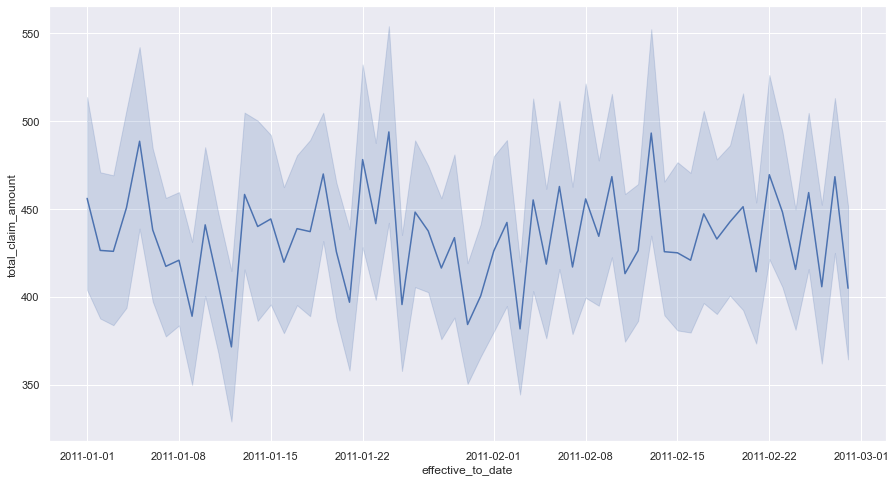

In [47]:
# Recovering effective_to_date column
sns.set(rc={'figure.figsize':(15,8)})
sns.lineplot(x="effective_to_date", y="total_claim_amount", data = customer_df)
plt.show()

I don't see anything weird. Let's go unit per unit.

In [48]:
days = customer_df['effective_to_date'].dt.day
days.value_counts()

27    361
10    356
26    350
19    347
14    338
3     336
28    330
5     325
11    317
17    316
2     309
7     308
21    308
20    305
18    303
1     302
25    300
23    298
22    294
6     287
24    286
13    284
15    283
8     283
9     283
12    282
16    281
4     279
31    178
29    160
30    145
Name: effective_to_date, dtype: int64

In [49]:
weeks = customer_df['effective_to_date'].dt.week
weeks.value_counts()

C:\Users\ameli\AppData\Local\Temp\ipykernel_9716\3859484927.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  weeks = customer_df['effective_to_date'].dt.week


4     1147
3     1137
5     1105
2     1079
8     1073
1     1049
7     1040
6     1035
52     308
9      161
Name: effective_to_date, dtype: int64

Something strange happened, weeks jump from 9 to 52. Let's check these rows.

In [50]:
customer_df['effective_to_date'].loc[customer_df['effective_to_date'].dt.isocalendar().week[customer_df['effective_to_date'].dt.isocalendar().week == 52]]

52   2011-02-21
52   2011-02-21
52   2011-02-21
52   2011-02-21
52   2011-02-21
        ...    
52   2011-02-21
52   2011-02-21
52   2011-02-21
52   2011-02-21
52   2011-02-21
Name: effective_to_date, Length: 308, dtype: datetime64[ns]

It looks like data is pointing to week 2.

In [51]:
customer_df['effective_to_date'].loc[customer_df['effective_to_date'].
                                     dt.isocalendar().week[customer_df['effective_to_date'].
                                                           dt.isocalendar().week == 2]]

2   2011-02-19
2   2011-02-19
2   2011-02-19
2   2011-02-19
2   2011-02-19
       ...    
2   2011-02-19
2   2011-02-19
2   2011-02-19
2   2011-02-19
2   2011-02-19
Name: effective_to_date, Length: 1079, dtype: datetime64[ns]

#### Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [52]:
X_train_fully_scaled.dtypes

coverage                         float64
education                        float64
employment_status                float64
location_code                    float64
vehicle_class                    float64
vehicle_size                     float64
state_California                 float64
state_Nevada                     float64
state_Oregon                     float64
state_Washington                 float64
response_Yes                     float64
gender_M                         float64
marital_status_Married           float64
marital_status_Single            float64
policy_Corporate L2              float64
policy_Corporate L3              float64
policy_Personal L1               float64
policy_Personal L2               float64
policy_Personal L3               float64
policy_Special L1                float64
policy_Special L2                float64
policy_Special L3                float64
renew_offer_type_Offer2          float64
renew_offer_type_Offer3          float64
renew_offer_type

In [53]:
X_test_fully_scaled.dtypes

coverage                         float64
education                        float64
employment_status                float64
location_code                    float64
vehicle_class                    float64
vehicle_size                     float64
state_California                 float64
state_Nevada                     float64
state_Oregon                     float64
state_Washington                 float64
response_Yes                     float64
gender_M                         float64
marital_status_Married           float64
marital_status_Single            float64
policy_Corporate L2              float64
policy_Corporate L3              float64
policy_Personal L1               float64
policy_Personal L2               float64
policy_Personal L3               float64
policy_Special L1                float64
policy_Special L2                float64
policy_Special L3                float64
renew_offer_type_Offer2          float64
renew_offer_type_Offer3          float64
renew_offer_type

#### Try a simple linear regression with all the data to see whether we are getting good results.

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


lm = LinearRegression().fit(X_train_fully_scaled, y_train)
y_pred_test = lm.predict(X_test_fully_scaled) 

print('R2 for our model is:', r2_score(y_test, y_pred_test))

R2 for our model is: 0.6148343287534581


#### Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

In [55]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

models_lst = [LinearRegression(), KNeighborsRegressor(n_neighbors = 14), MLPRegressor(solver= 'sgd')]

def models_automation(models_list, X_tr, y_tr, X_te, y_te):
    for model in models_list:
            model.fit(X_tr, y_tr)
            print(f"{model.__class__.__name__}: Train -> {model.score(X_tr, y_tr)}, Test -> {model.score(X_te, y_te)}")

models_automation(models_lst, X_train_fully_scaled, y_train, X_test_fully_scaled, y_test)

LinearRegression: Train -> 0.628208823789469, Test -> 0.6148343287534581
KNeighborsRegressor: Train -> 0.47514909203593747, Test -> 0.40201141177790856
MLPRegressor: Train -> 0.6550985280991285, Test -> 0.632926763336285


As it can be seen, LinearRegression gives us the best results on the test set (by the way, we have concluded that the best number of neighbors for the KNN model is 14 by trial and error).

## Feature Extraction

Open the categoricals variable we created before. Open the categoricals variable we created before. What can you see?

In [56]:
categorical_to_plot = customer_df.select_dtypes(include=object)
categorical_to_plot = categorical_to_plot.drop('customer', axis=1)

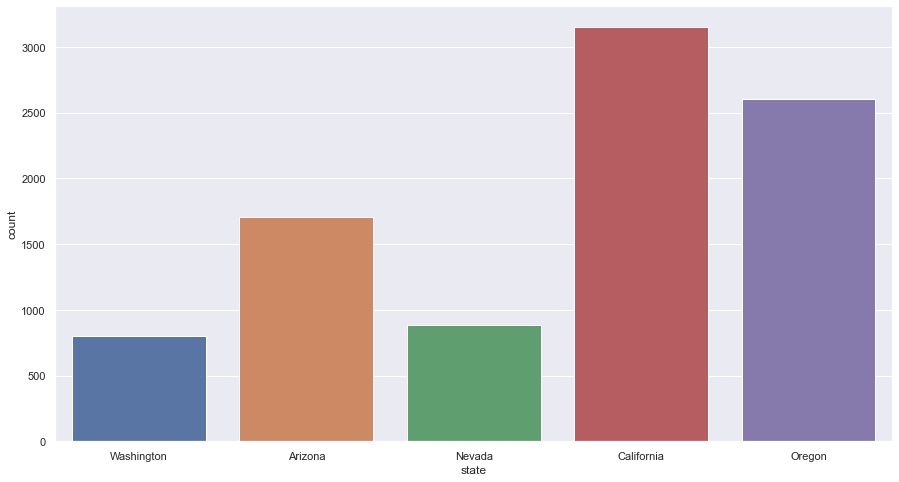

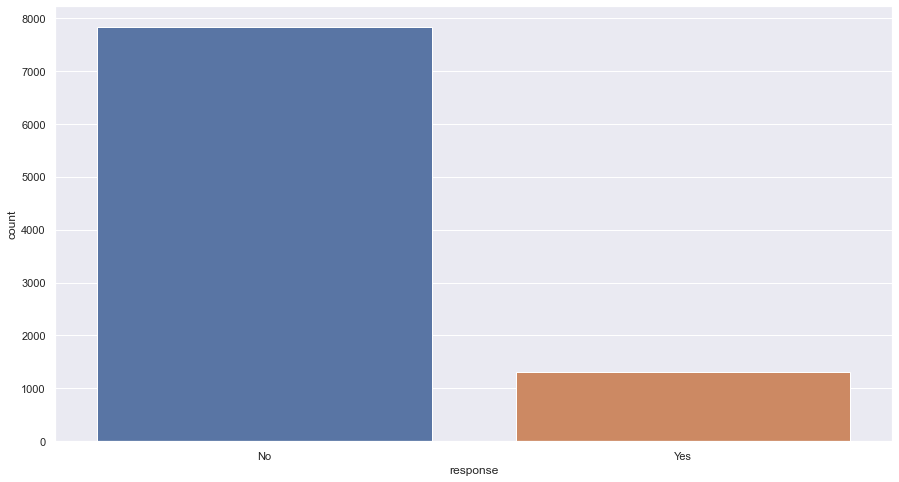

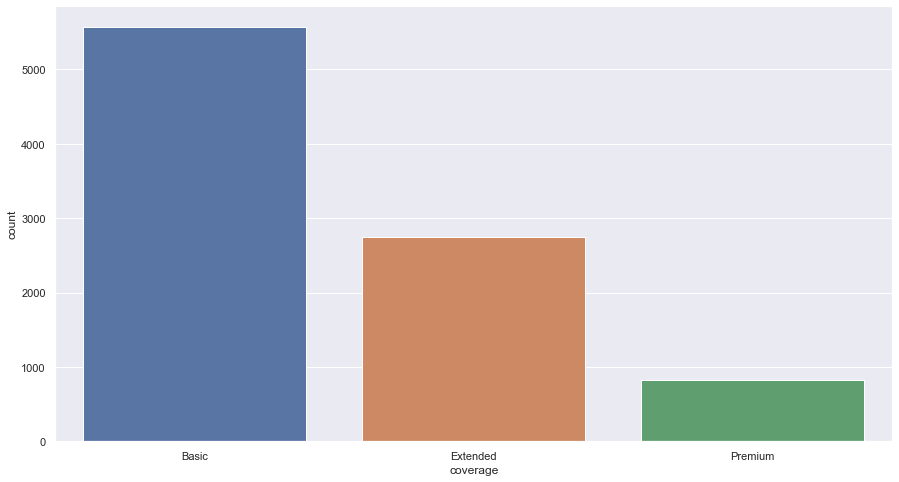

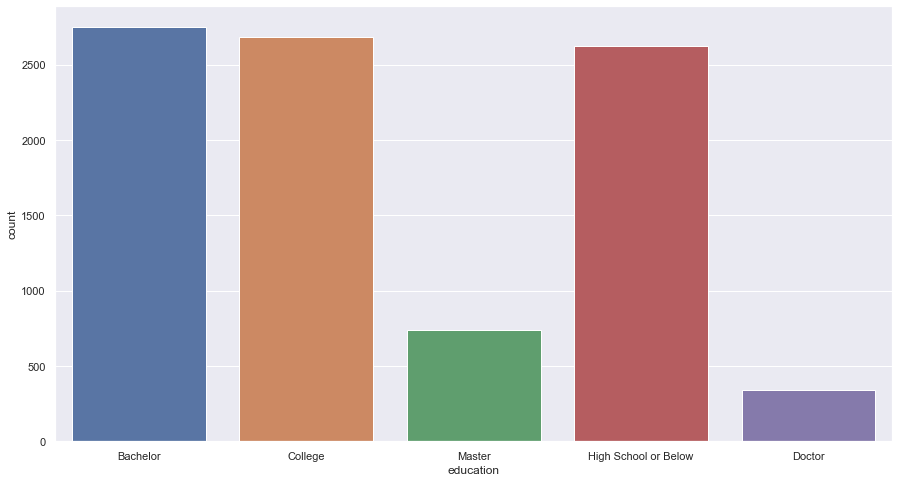

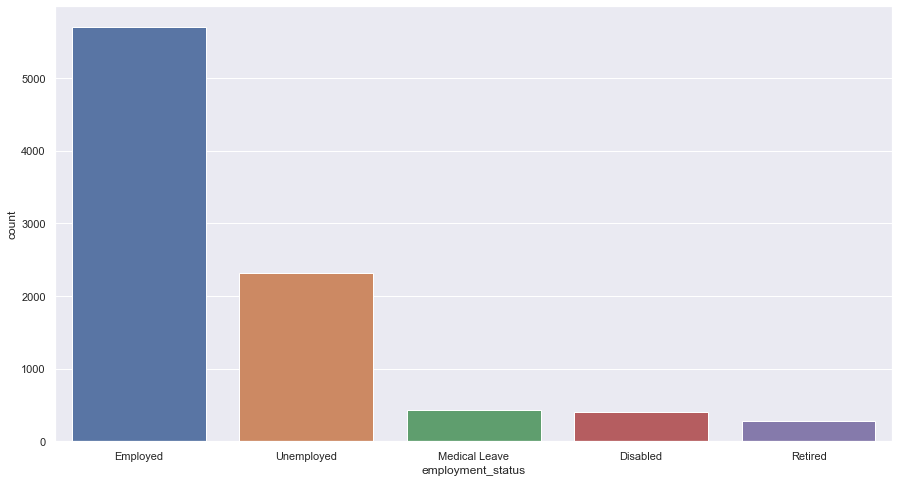

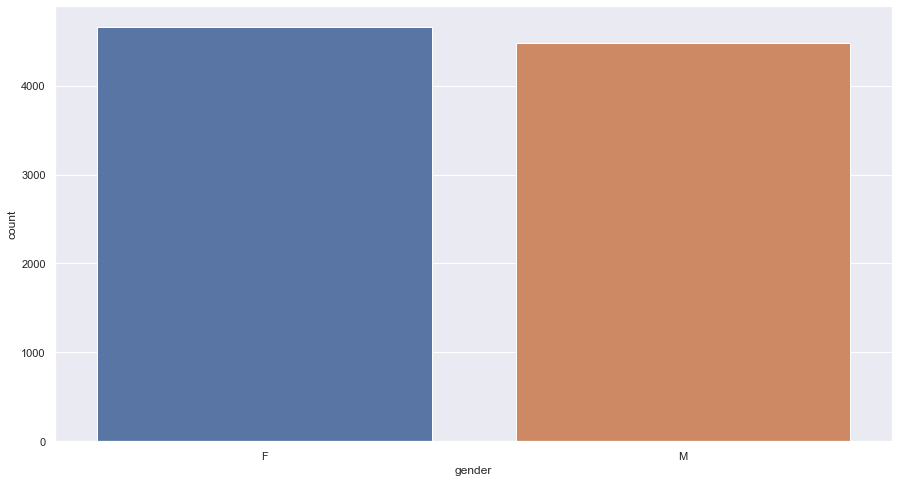

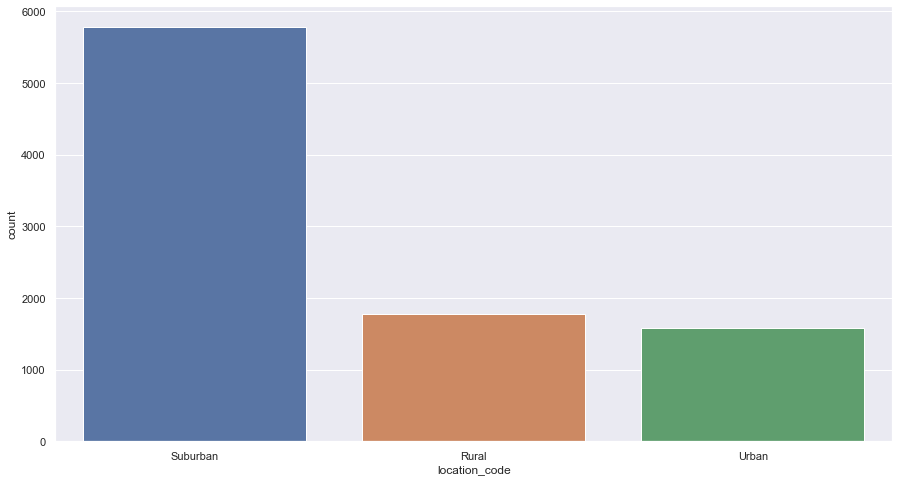

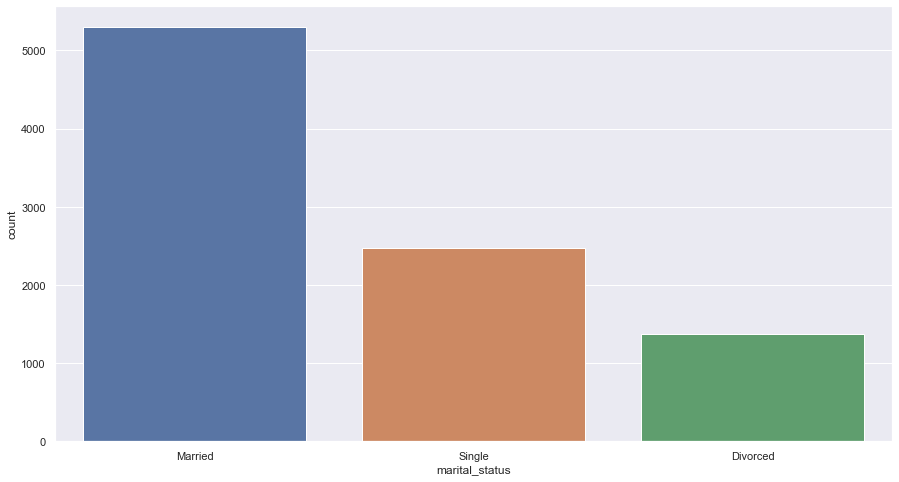

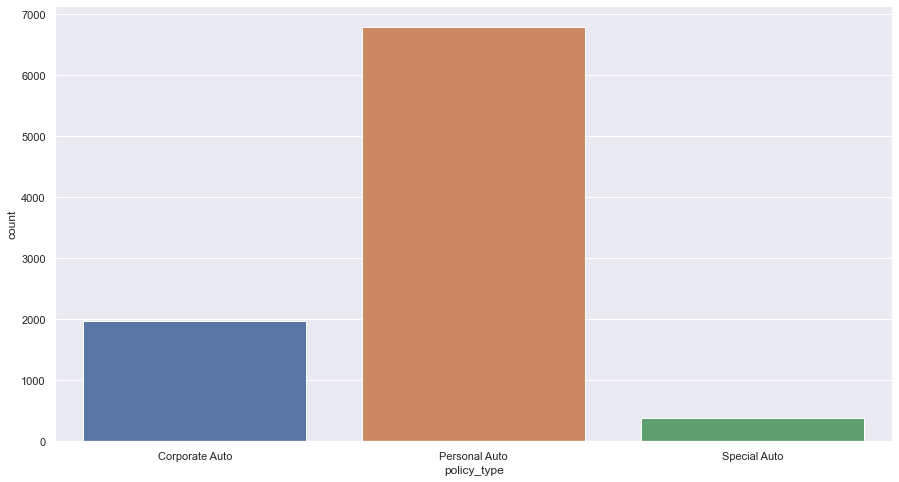

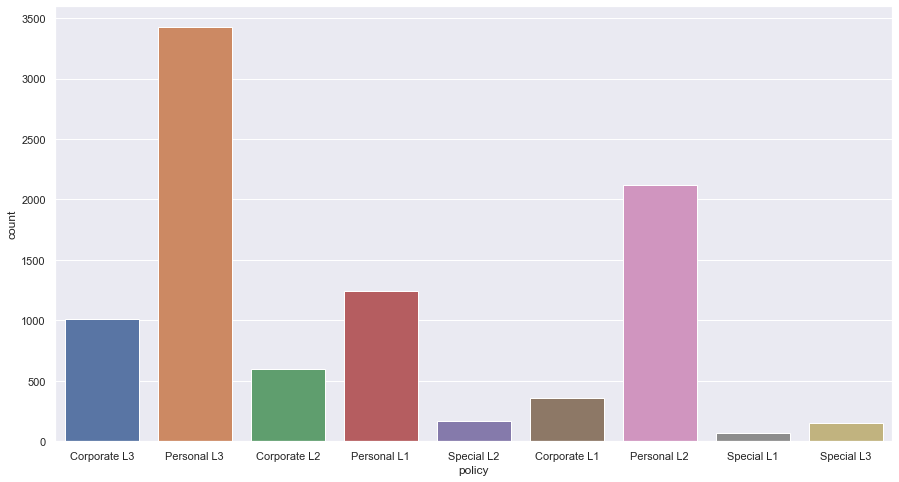

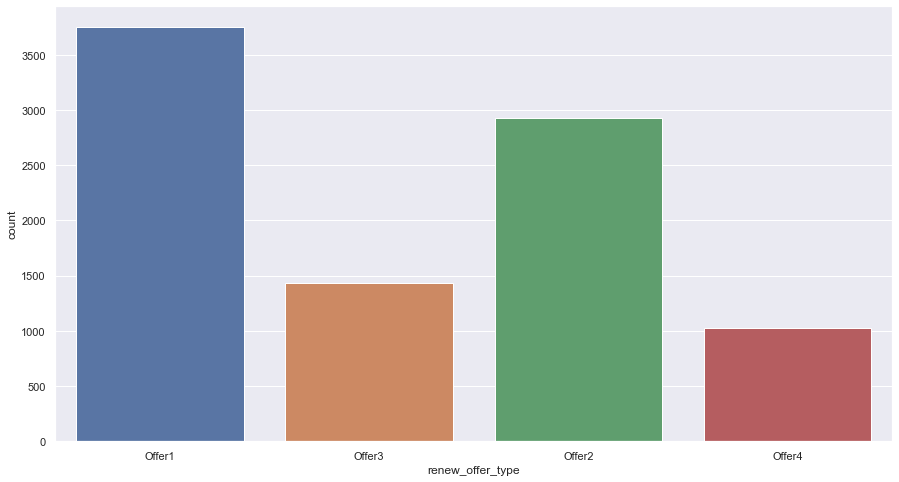

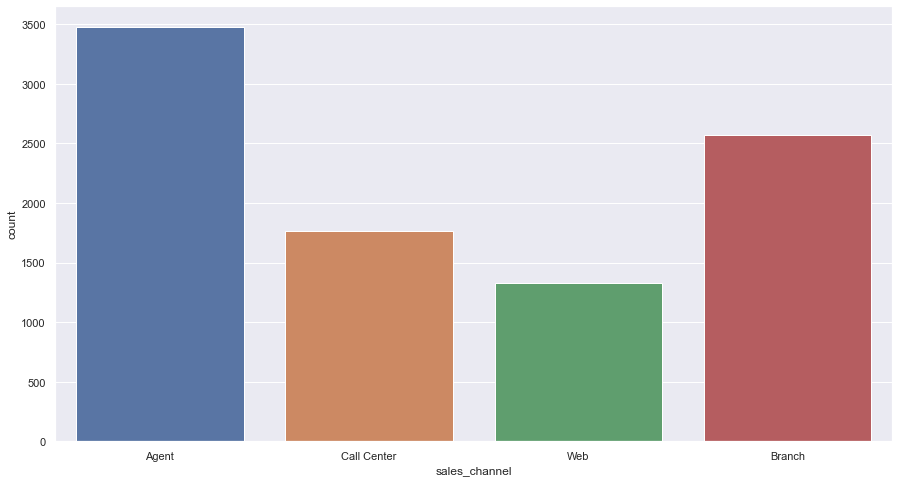

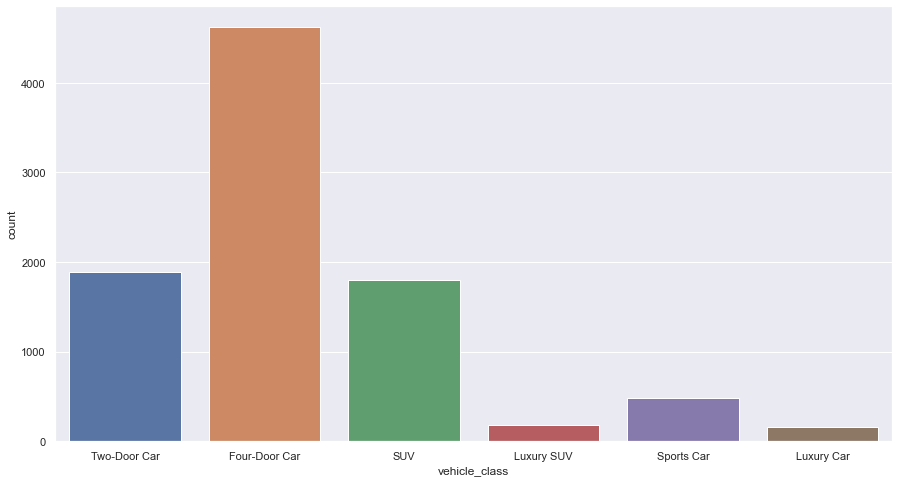

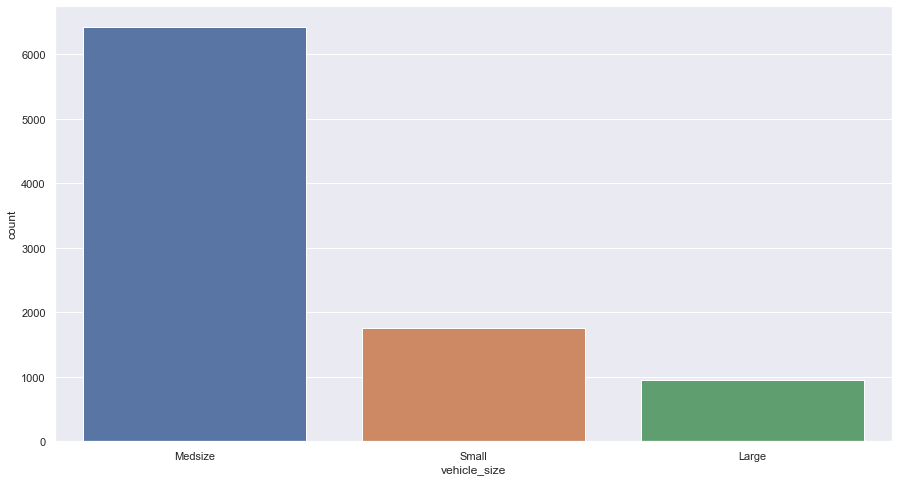

In [57]:
for col in categorical_to_plot:
    sns.countplot(x=categorical_to_plot[col])
    plt.show()

With a huge class imbalance in most of the columns, we could reduce the number of categories for each column and combine them (already done in previous labs). Also, there are some redundant data.

#### There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

In [58]:
# As done previously, we can drop policy_type.
print('Unique values of policy column:', categorical_to_plot['policy'].unique())
print('Unique values of policy_type column:', categorical_to_plot['policy_type'].unique())

Unique values of policy column: ['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
Unique values of policy_type column: ['Corporate Auto' 'Personal Auto' 'Special Auto']


#### Plot time variable. Can you extract something from it?


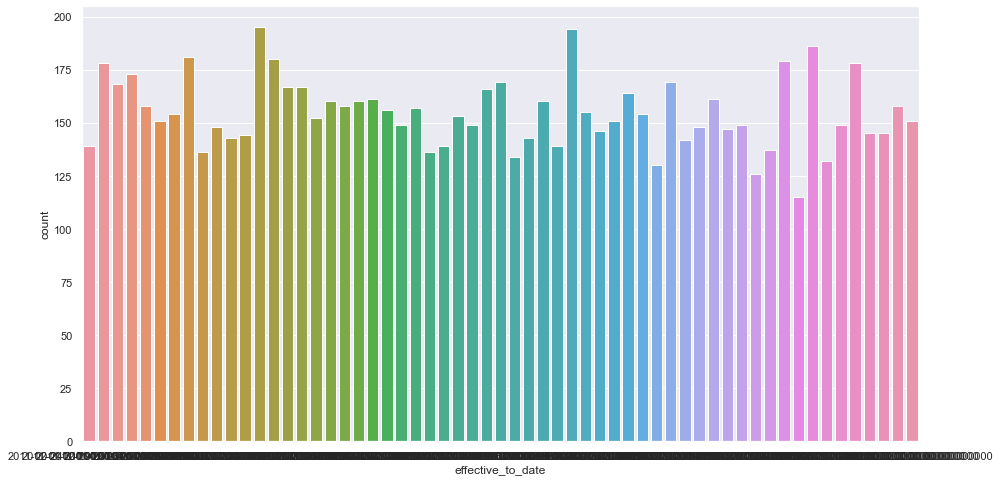

In [59]:
sns.countplot(x = customer_df['effective_to_date'])
plt.show()

Everything looks ok. Let's take a closer look.

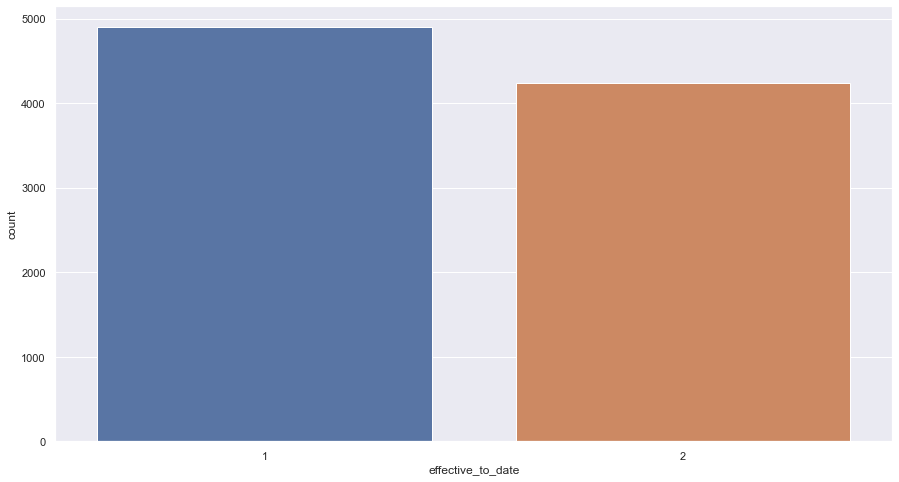

In [60]:
sns.countplot(x = customer_df['effective_to_date'].dt.month)
plt.show()

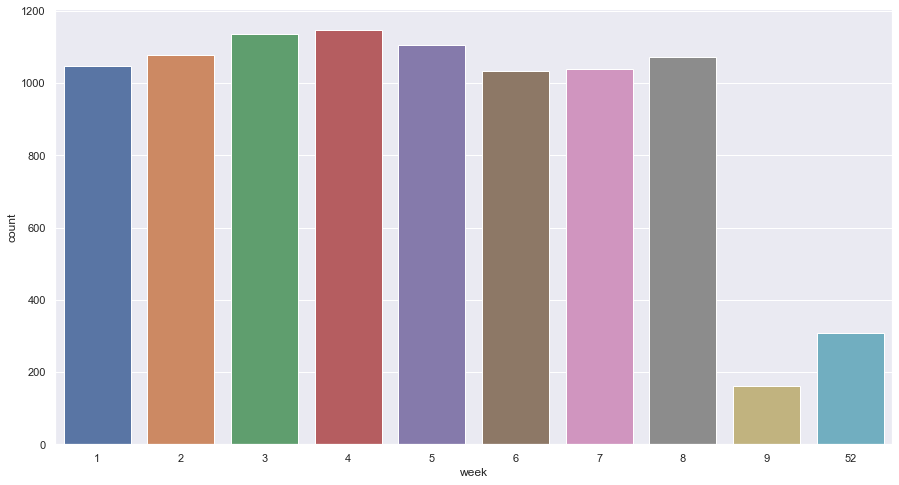

In [61]:
sns.countplot(x = customer_df['effective_to_date'].dt.isocalendar().week)
plt.show()

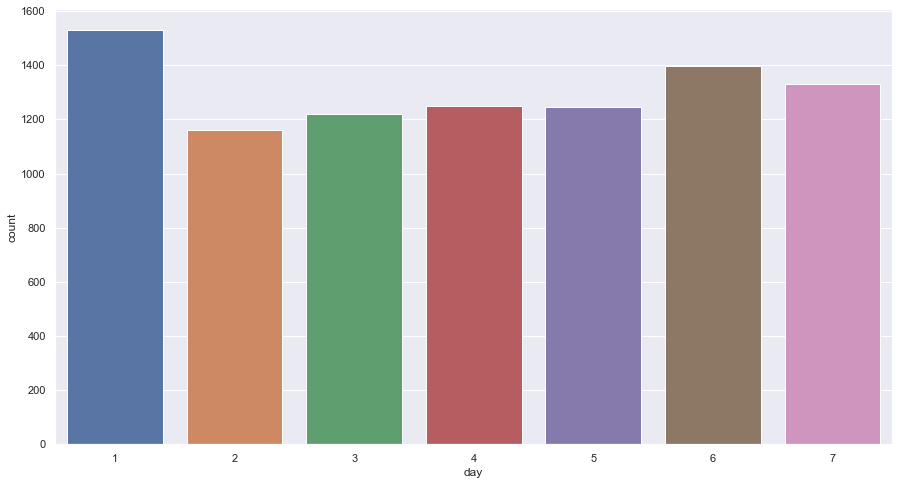

In [62]:
sns.countplot(x = customer_df['effective_to_date'].dt.isocalendar().day)
plt.show()

C:\Users\ameli\AppData\Local\Temp\ipykernel_9716\4106378772.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  sns.lineplot(x = customer_df['effective_to_date'].dt.week, y = customer_df['total_claim_amount'])


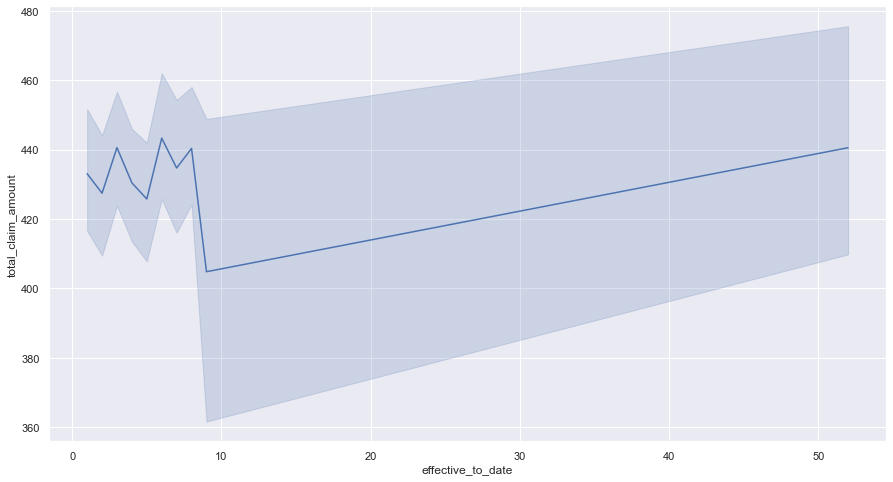

In [63]:
sns.lineplot(x = customer_df['effective_to_date'].dt.week, y = customer_df['total_claim_amount'])
plt.show()

As seen before, there is a week wrong (week 52). Let's correct this error and plot the relationship between both variables again.

In [64]:
customer_df['effective_to_date'].loc[customer_df['effective_to_date'].dt.isocalendar().week == 52]

47     2011-01-02
60     2011-01-02
87     2011-01-01
133    2011-01-02
205    2011-01-02
          ...    
9041   2011-01-02
9063   2011-01-01
9085   2011-01-01
9091   2011-01-02
9103   2011-01-01
Name: effective_to_date, Length: 308, dtype: datetime64[ns]

In [65]:
customer_df['effective_to_date'].loc[customer_df['effective_to_date'].dt.isocalendar().week == 1]

11     2011-01-06
17     2011-01-05
36     2011-01-08
69     2011-01-09
106    2011-01-04
          ...    
9090   2011-01-07
9104   2011-01-09
9113   2011-01-06
9126   2011-01-09
9128   2011-01-06
Name: effective_to_date, Length: 1049, dtype: datetime64[ns]

It looks like column 52 is, in fact, column 0. 

C:\Users\ameli\AppData\Local\Temp\ipykernel_9716\2593680285.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  time_df['month'] = customer_df['effective_to_date'].dt.week
C:\Users\ameli\AppData\Local\Temp\ipykernel_9716\2593680285.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_df['month'] = customer_df['effective_to_date'].dt.week
C:\Users\ameli\AppData\Local\Temp\ipykernel_9716\2593680285.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

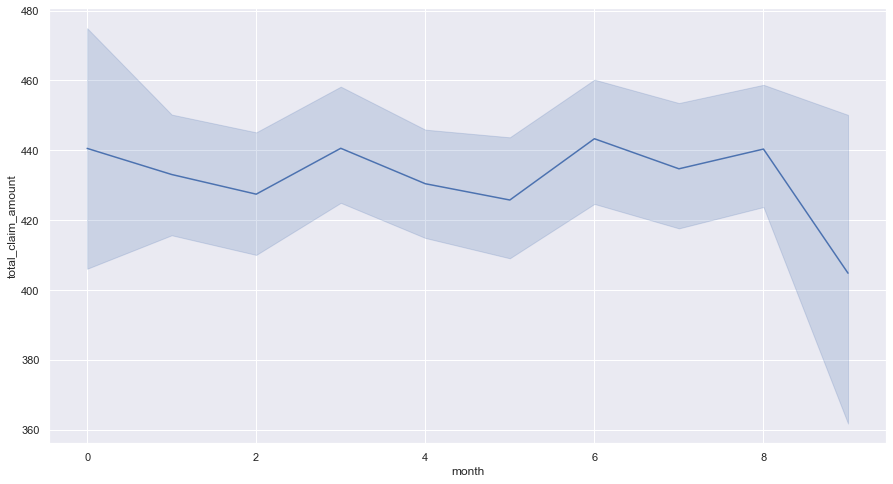

In [66]:
time_df = customer_df[['effective_to_date', 'total_claim_amount']]
time_df['month'] = customer_df['effective_to_date'].dt.week

time_df['month'] = time_df['month'].apply(lambda x: 0 if x == 52 else x)
sns.lineplot(x = time_df['month'], y = customer_df['total_claim_amount'])
plt.show()